# Synthia's notebook to experiment with the data 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
import plotly.express as px

## Load Datasets

In [2]:
NSDUH2021 = readInData("datasets/National Survey on Drug Use and Health 2021/NSDUH_2021_Tab.txt", "txt")
NSDUH2019 = readInData("datasets/National Survey on Drug Use and Health 2019/NSDUH_2019_Tab.txt", "txt")
NSDUH2018 = readInData("datasets/National Survey on Drug Use and Health 2018/NSDUH_2018_Tab.tsv", "tsv")


/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2799) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)
/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2575) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)
/Users/synth/Documents/UNI/418/group-project-gamon/helper_code.py:17: DtypeWarning: Columns (2525) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(path)


In [3]:
CoreTrends2021 = readInData("datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv", "csv")
CoreTrends2019 = readInData("datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv", "csv")
CoreTrends2018 = readInData("datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv", "csv")

## Clean up data


###ADMT16 - ADMT21  : How many visits to various types of outpatient facilities for mental health

<br>AGE3: age (intervals of 2, e.g. 1 = age 12 or 13, up to age 65)
<br>IRSEX: gender 1=male, 2=female

<br>ADMT01 : AUINPYR : stayed in hospital for mental health
<br>ADMT25/ADMTREF25 : AURXYR : taken any medication for mental health

<br>YE09 : YEATNDYR : HAs attended some sort of school
<br>YE10 : YESCHFLT : how much they like going to school (1-4, 4=hated it)
<br>YE23b : YEPRBSLV : participated in self-esteem group

<br>NERVE30 : DSTNRV30 : How often felt nervous (1-5, 5=never) in past 30 days
<br>HOPE30 : DSTHOP30 : How often feel hopeless
<br>NOCHR30 : DSTCHR30 : How often felt depressed
<br>DOWN30 : DSTNGD30 : How often feeling down/worthless
<br>WORST30 : DSTWORST : In past year has there been a worse month than current (1-2, 2=No)
<br>DSNERV1 : DSTNRV12 : in WORST30 month, how often felt nervous
<br>DSHOPE : DSTHOP12 : In WORST30 month, how often felt hopeless
<br>DSNOCHR : DSTCHR12 : in WORST30 month, how often felt depressed
<br>DSDOWN : DSTNGD12 : in WORST30 month, how often felt worthless

<br>LICONCEN : IMPCONCN : Difficulty concentrating in their worst month (1-4, 4= severe)
<br>LIGOOUT1 : IMPGOUT : Difficulty leaving house
<br>LISTRAN1 : IMPPEOP : Difficulty dealing with less known people
<br>LISOC1 : IMPSOC : Difficulty participating in social activites
<br>LISOC2 : IMPSOCM : Did mental health problems keep from participating socially

<br>SUI01 : SUICTHNK : Think about suicide in past year
<br>SUI02 : SUIPLANYR :  Plans for suicide

<br>ASC21 : ADDPREV : Long periods of feeling sad


In [4]:
cols = ["AGE3","IRSEX","AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","SUIPLANYR","ADDPREV"]
cols1819 = ["AGE2", "IRSEX", "AUINPYR","AURXYR","YEATNDYR","YESCHFLT","YEPRBSLV","DSTNRV30","DSTHOP30","DSTCHR30","DSTNGD30","DSTWORST","DSTNRV12","DSTHOP12","DSTCHR12","DSTNGD12","IMPCONCN","IMPGOUT","IMPPEOP","IMPSOC","IMPSOCM","SUICTHNK","ADDPREV"]

NSDUH2019_wantedCols = getWantedColumns(NSDUH2019, cols1819)
NSDUH2018_wantedCols = getWantedColumns(NSDUH2018, cols1819)
NSDUH2021_wantedCols = getWantedColumns(NSDUH2021, cols)

Core trends variables:

web1a    -	Twitter
web1b    -	Instagram
web1c    -	Facebook 
web1d    -	Snapchat
web1e    -	YouTube

How often use social media, 1-5, 5=less often

sns2a    -	Twitter
sns2b    -	Instagram
sns2c    -	Facebook 
sns2d    -	Snapchat
sns2e    -	YouTube

gender  - gender
age     - age



In [5]:
CoreTrends2021Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","gender", "age"]
CoreTrends2019Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]
CoreTrends2018Cols = ["web1a", "web1b", "web1c", "web1d", "web1e","sns2a", "sns2b", "sns2c", "sns2d", "sns2e","sex", "age"]

CoreTrends2021_wantedCols = getWantedColumns(CoreTrends2021, CoreTrends2021Cols)
CoreTrends2019_wantedCols = getWantedColumns(CoreTrends2019, CoreTrends2019Cols)
CoreTrends2018_wantedCols = getWantedColumns(CoreTrends2018, CoreTrends2018Cols)

In [6]:
id = ['age']
values = ["web1a", "web1b", "web1c", "web1d", "web1e"]
CoreTrends2018_long = cleanUpCoreTrends(CoreTrends2018_wantedCols, id, values, 2018, False)
CoreTrends2019_long = cleanUpCoreTrends(CoreTrends2019_wantedCols, id, values, 2019, False)
CoreTrends2021_long = cleanUpCoreTrends(CoreTrends2021_wantedCols, id, values, 2021, False)

In [7]:
CoreTrends2019_long

,age,variable,value
0,65+,web1a,Doesnt Use Social Media
1,50-64,web1a,Doesnt Use Social Media
2,50-64,web1a,Uses Social Media
3,65+,web1a,Doesnt Use Social Media
4,50-64,web1a,Doesnt Use Social Media
...,...,...,...
7225,65+,web1e,Doesnt Use Social Media
7226,50-64,web1e,Uses Social Media
7227,18-25,web1e,Uses Social Media
7228,50-64,web1e,Uses Social Media


In [8]:
CoreTrends2018_long

,age,variable,value
0,26-34,web1a,Doesnt Use Social Media
1,65+,web1a,Doesnt Use Social Media
2,50-64,web1a,Doesnt Use Social Media
3,50-64,web1a,Doesnt Use Social Media
4,50-64,web1a,Uses Social Media
...,...,...,...
9760,65+,web1e,Doesnt Use Social Media
9761,65+,web1e,Doesnt Use Social Media
9762,35-49,web1e,Doesnt Use Social Media
9763,65+,web1e,Doesnt Use Social Media


In [9]:
SMUse_sum_CoreTrends2018 = getPercentage(CoreTrends2018_long, "Uses Social Media", "age", 2018)
SMUse_sum_CoreTrends2019 = getPercentage(CoreTrends2019_long, "Uses Social Media", "age", 2019)
SMUse_sum_CoreTrends2021 = getPercentage(CoreTrends2021_long, "Uses Social Media", "age", 2021)

In [10]:
# SMUse_sum_CoreTrends2018['dataset'] = '2018 - Uses Social Media'
# SMUse_sum_CoreTrends2019['dataset'] = '2019 - Uses Social Media'
# SMUse_sum_CoreTrends2021['dataset'] = '2021 - Uses Social Media'

CoreTrends_SMUseSum_concat = pd.concat([SMUse_sum_CoreTrends2018,SMUse_sum_CoreTrends2019, SMUse_sum_CoreTrends2021])

<Axes: xlabel='age', ylabel='percentage'>

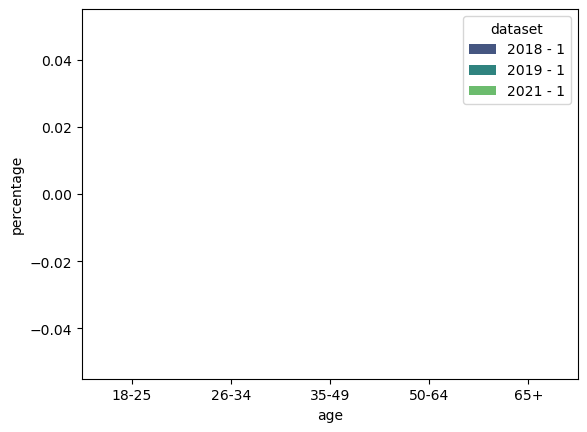

In [11]:
sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='viridis')


In [12]:
id=['AGE2']
id2=['AGE3']
# values = ['IRSEX', 'AUINPYR', 'AURXYR', 'YEATNDYR', 'YESCHFLT',
#             'YEPRBSLV', 'DSTNRV30', 'DSTHOP30', 'DSTCHR30', 'DSTNGD30', 'DSTWORST',
#             'DSTNRV12', 'DSTHOP12', 'DSTCHR12', 'DSTNGD12', 'IMPCONCN', 'IMPGOUT',
#             'IMPPEOP', 'IMPSOC', 'IMPSOCM', 'SUICTHNK', 'ADDPREV']
values = ['DSTCHR12']

NSDUH2018_long = cleanUpNSDUH(NSDUH2018_wantedCols,id,values, 2018)
NSDUH2019_long = cleanUpNSDUH(NSDUH2019_wantedCols,id,values, 2019)
NSDUH2021_long = cleanUpNSDUH(NSDUH2021_wantedCols,id2,values, 2021)


In [13]:
percDepressed_NSDUH2018 = getPercentage(NSDUH2018_long, "Depressed", "age", 2018)
percDepressed_NSDUH2019 = getPercentage(NSDUH2019_long, "Depressed", "age", 2019)
percDepressed_NSDUH2021 = getPercentage(NSDUH2021_long, "Depressed", "age", 2021)

In [14]:
# percDepressed_NSDUH2018['dataset'] = '2018 - Depressed'
# percDepressed_NSDUH2019['dataset'] = '2019 - Depressed'
# percDepressed_NSDUH2021['dataset'] = '2021 - Depressed'

NSDUH_concat = pd.concat([percDepressed_NSDUH2018,percDepressed_NSDUH2019,percDepressed_NSDUH2021])

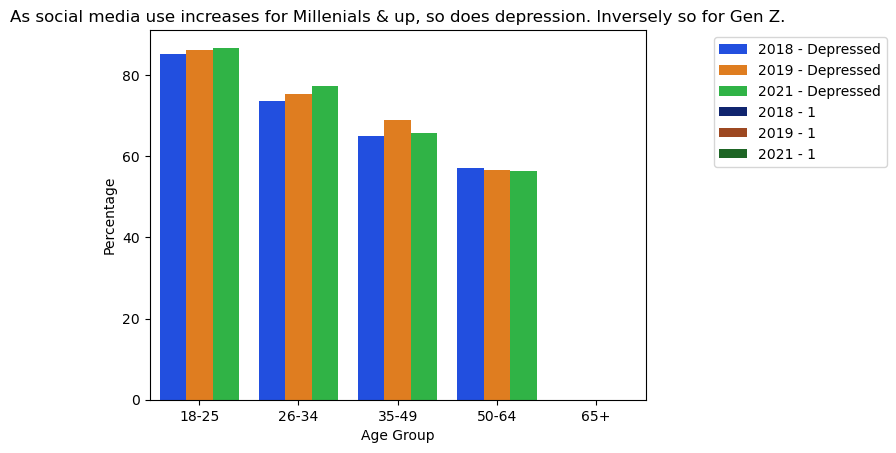

In [15]:
sns.barplot(data=NSDUH_concat, x='age', y='percentage',hue='dataset', palette='bright')
sns.barplot(data=CoreTrends_SMUseSum_concat, x='age', y='percentage', hue='dataset' ,palette='dark')

plt.title("As social media use increases for Millenials & up, so does depression. Inversely so for Gen Z.")
plt.ylabel("Percentage")
plt.xlabel("Age Group")
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))